# Imports

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Analyzing Errors

Analyzing the notebooks that ran into various errors while the script was executing (`github2017-third-errors.csv`)

## Loading the .csv file

In [54]:
errors_filepath = 'github2017-third-errors.csv'
errors_df = pd.read_csv(errors_filepath)

# initial look at the data
errors_df.head()

,nb_id,repo_id,err_in
0,116896,66478811,language
1,329885,34647497,language
2,408548,93282436,api
3,484614,95004508,no_code
4,806977,93647670,api


The `errors.csv` file has 3 columns, storing the notebook id, repository id, and the error associated with that notebook (see the README in the parent directory for interpretation.

## Plotting the error data

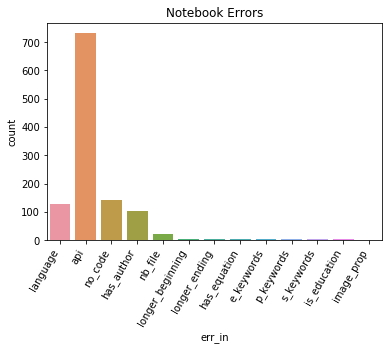

In [55]:
# create a bar plot of the errors column
error_plot = sns.countplot(x='err_in', data=errors_df)

# fix the appearance of the bar plot (we put these under temp variables to hide the text)
temp = error_plot.set_xticklabels(error_plot.get_xticklabels(), rotation=60, ha="right")
temp = error_plot.set(title = "Notebook Errors")

The vast majority of errors were due to a non-responsive API; this means that the link leading to the repository or notebook file has become invalid. This can happen due to the repository/file being deleted, the repository being made private, etc.

The other more common errors are `language`, `no_code`, and `has_author`. Very few notebook files were "malformed" (the low frequency of `nb_file` errors.

The extremely small frequency of the rest of the errors (`longer_beginning`, `longer_ending`, etc.) was caused by a small bug in the code: some cells did not have a `source` attribute. This bug was fixed.

# Analyzing Features

Analyzing the data obtained from running the feature scripts on the dataset (`github2017-third-run.csv`)

## Loading the .csv file

In [56]:
results_filepath = 'github2017-third-run.csv'
results_df = pd.read_csv(results_filepath)

# initial look at the data
results_df.head()

,nb_id,repo_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,e_keywords,p_keywords,s_keywords,is_education,language
0,900493,85972539,NaN,NaN,False,NaN,0.991818,0.400000,0.000000,3,0.500000,0.0,0.0,0.0,False,python
1,322852,45655960,False,False,False,False,0.029944,0.000000,0.400000,2,NaN,0.0,1.0,0.0,False,python
2,457759,27685708,True,False,False,False,NaN,0.666667,0.250000,1,1.000000,0.0,0.0,1.0,False,python
3,672138,92749043,True,False,False,False,1.000000,0.695652,0.080000,1,0.312500,0.0,0.0,0.0,False,python
4,103154,30734070,False,False,False,False,NaN,0.638393,0.257426,1,0.006993,1.0,0.0,0.0,False,python


Along with notebook and repository ID, the results of running 12 feature scripts are recorded. The new features for this run are:

- `longer_beginning`: longer markdown cell(s) at the beginning of the notebook
- `longer_ending`: longer markdown cell(s) at the end of the notebook
- `has_author`: the notebook has an author name in a code or markdown cell
- `has_equation`: the notebook uses equations (math mode) in a markdown cell
- `jupyter_prop`: the proportion of code in the repository written in Jupyter Notebook
- `output_cell_prop`: the proportion of code cells in the notebook that have output
- `markdown_prop`: the proportion of cells in the notebook that are markdown cells
- `num_contrib`: the number of contributors to the notebook's repository
- `image_prop`: the proportion of output cells in the notebook that contain an image/table/graph
- `e/p/s_keywords`: the number of exploratory, pipeline/production, and sharing keywords occurring in the notebook
- `is_education`: the notebook has an educaitonal purpose
- `language`: the programming language of the notebook

We see that there are various `NaN` values scattered across the data; this means that, either:

- the feature being measured was not applicable (ex. if there are no markdown cells (`markdown_prop = 0`), then it wouldn't make sense to measure their length, look for the use of equations, etc.)
- an error occurred while the feature was being measured (ex. invalid user links with `has_author`)

## Plotting and Cleaning the Data

Before we plot each column separately, we want to filter out the `NaN` values


In [57]:
def clean_column(field):
    
    # isolate the right columns
    original = results_df[['nb_id', 'repo_id', field]]
    
    # filter out NaN rows
    clean = original.dropna(subset = [field])
    
    # return the cleaned column
    return clean 

### Proportion of Markdown Cells

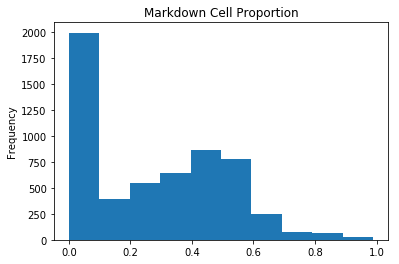

In [58]:
# no need to clean the column, there should be no instances of NaN
markdown_prop = results_df[['nb_id', 'repo_id', 'markdown_prop']]

# plot the data
markdown_prop_plot = markdown_prop['markdown_prop'].plot(kind='hist')

# set title
temp = markdown_prop_plot.set_title('Markdown Cell Proportion')

The majority of notebooks had less than half of their cells as markdown cells, while a significant number actually had a very little proportion of their cells be markdown cells.

### Longer Markdown Cells at the Beginning/End 

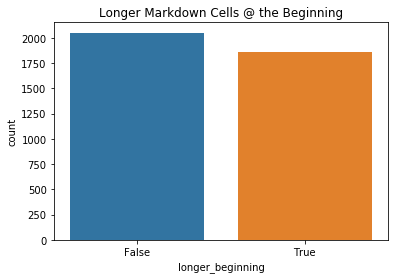

In [59]:
# clean the data
longer_beginning = clean_column('longer_beginning')

# plot the data
beginning_plot = sns.countplot(x='longer_beginning', data=longer_beginning)

# fix appearance
temp = beginning_plot.set(title = 'Longer Markdown Cells @ the Beginning')

The number of notebooks with longer markdown cells at the beginning was very close to the number of those without longer markdown cells at the beginning

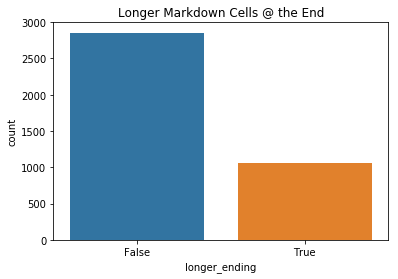

In [60]:
# clean the data
longer_ending = clean_column('longer_ending')

# plot the data
ending_plot = sns.countplot(x='longer_ending', data=longer_ending)

# fix appearance
temp = ending_plot.set(title = 'Longer Markdown Cells @ the End')

It seems that the majority of notebooks did not have longer markdown cells at the end.

**Note (TODO): it may be interesting to see whether those notebooks that had longer markdown cells at the beginning were also those that had longer markdown cells at the end**

### Author and Equation Detection

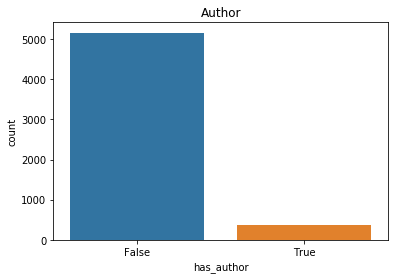

In [61]:
# clean the data
has_author = clean_column('has_author')

# plot the data
has_author = sns.countplot(x='has_author', data=has_author)

# fix appearance
temp = has_author.set(title = 'Author')

The vast majority of notebooks did not have an author.

**Note: the script used to detect author is pretty shallow; it searches for instances of usernames and names of the author and contributors to the repository, but in most cases full, real names are not recorded or even used by the user. There are most likely many false negatives.**

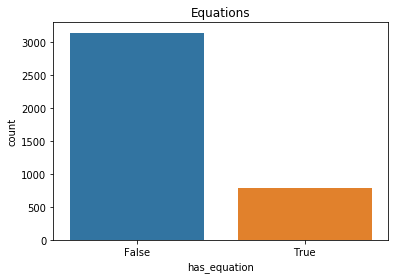

In [62]:
# clean the data
has_equation = clean_column('has_equation')

# plot the data
has_equation = sns.countplot(x='has_equation', data=has_equation)

# fix appearance
temp = has_equation.set(title = 'Equations')

Most notebooks did not include equations in their markdown cells.

### Proportion of Code Cells with Output

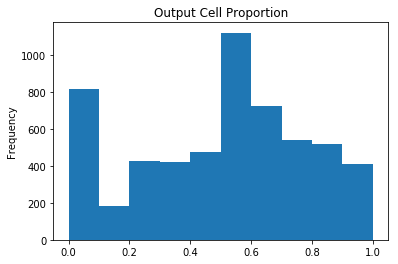

In [63]:
# no need to clean the column, there should be no instances of NaN
output_prop = results_df[['nb_id', 'repo_id', 'output_cell_prop']]

# plot the data
output_prop_plot = output_prop['output_cell_prop'].plot(kind='hist')

# set title
temp = output_prop_plot.set_title('Output Cell Proportion')

Pretty mixed results, but most notebooks had at least half of their code cells display output of some kind, with a spike in notebooks that had very little of their code cells display output.

### Proportion of Output Cells with Images 

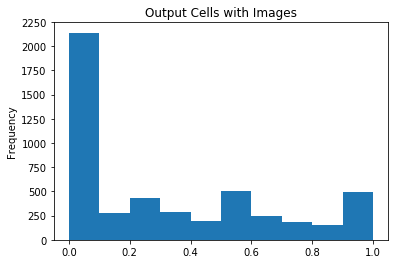

In [64]:
# clean the data
image_prop = clean_column('image_prop')

# plot the data
image_prop_plot = image_prop['image_prop'].plot(kind='hist')

# set title
temp = image_prop_plot.set_title('Output Cells with Images')

Pretty even distribution, except a vast majority of notebooks had a very little proportion of output cells that contained images (tables or graphs)

### Proportion of Repository Code in Jupyter Notebook

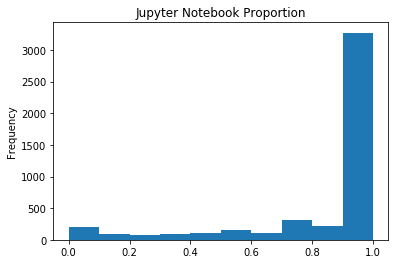

In [65]:
# clean the data
jupyter_prop = clean_column('jupyter_prop')

# plot the data
jupyter_prop_plot = jupyter_prop['jupyter_prop'].plot(kind='hist')

# set title
temp = jupyter_prop_plot.set_title('Jupyter Notebook Proportion')

For the majority of notebooks, the majority of their repository was code written in Jupyter Notebook

**Note (TODO): It might make more sense to analyze by repository for this one, since there are many instances of notebooks from the same repository**

### Number of Contributors (to the Repository)

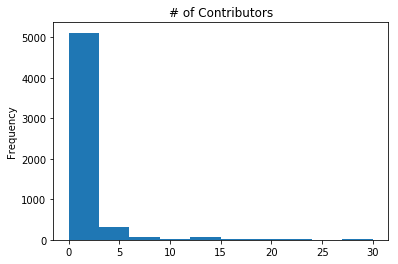

In [66]:
# no need to clean the column, there should be no instances of NaN
num_contrib = results_df[['nb_id', 'repo_id', 'num_contrib']]

# plot the data
num_contrib_plot = num_contrib['num_contrib'].plot(kind='hist')

# set title
temp = num_contrib_plot.set_title('# of Contributors')

The vast majority of repositories (of the notebooks) had very little contributors (0-5)

**Note (TODO): It might make more sense to analyze by repository for this one, since there are many instances of notebooks from the same repository**

### Keywords

#### Exploratory Notebook Keywords

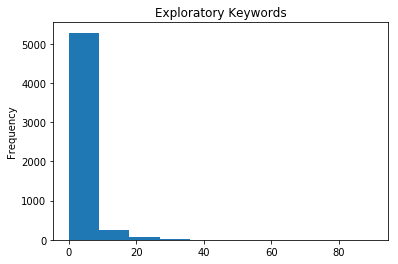

In [67]:
# no need to clean the column, there should be no instances of NaN
e_keywords = results_df[['nb_id', 'repo_id', 'e_keywords']]

# plot the data
e_keywords_plot = e_keywords['e_keywords'].plot(kind='hist')

# set title
temp = e_keywords_plot.set_title('Exploratory Keywords')

#### Pipeline/Production Notebook Keywords

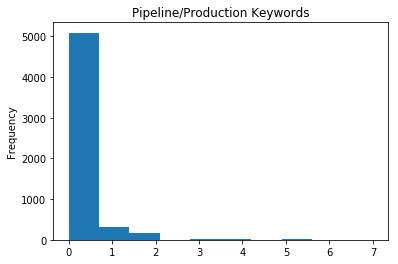

In [68]:
# no need to clean the column, there should be no instances of NaN
p_keywords = results_df[['nb_id', 'repo_id', 'p_keywords']]

# plot the data
p_keywords_plot = p_keywords['p_keywords'].plot(kind='hist')

# set title
temp = p_keywords_plot.set_title('Pipeline/Production Keywords')

#### Sharing Notebook Keywords

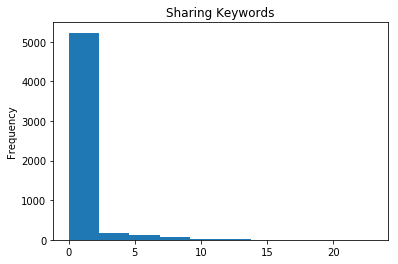

In [69]:
# no need to clean the column, there should be no instances of NaN
s_keywords = results_df[['nb_id', 'repo_id', 's_keywords']]

# plot the data
s_keywords_plot = s_keywords['s_keywords'].plot(kind='hist')

# set title
temp = s_keywords_plot.set_title('Sharing Keywords')

It seems that more notebooks contained more instances of exploratory keywords, then sharing, then very little pipeline/production keywords. 

**Note: this is probably due to the fact that that is also the order of number of keywords I had recorded for each category.**

### Language

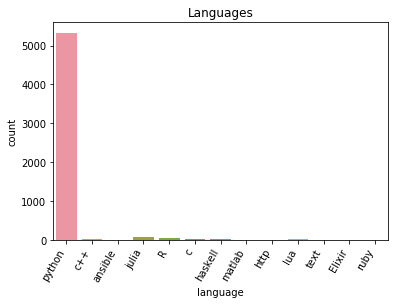

In [70]:
# clean the data
languages = clean_column('language')

# create a bar plot of the languages column
languages_plot = sns.countplot(x='language', data=languages)

# fix the appearance of the bar plot (we put these under temp variables to hide the text)
temp = languages_plot.set_xticklabels(languages_plot.get_xticklabels(), rotation=60, ha="right")
temp = languages_plot.set(title = "Languages")

The vast majority of notebooks were coded in Python.

**Note (TODO): based on the huge proportion of notebooks written in Python, it may be worth to just filter the non-Python notebooks out? not sure if this will have an effect on future analysis at all**

### Educational Notebooks

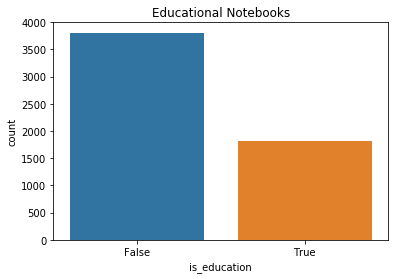

In [71]:
# clean the data
is_education = clean_column('is_education')

# plot the data
is_education = sns.countplot(x='is_education', data=is_education)

# fix appearance
temp = is_education.set(title = 'Educational Notebooks')

Most of the notebooks were not educational (homework, quizzes, tutorials, etc.), but a significant number did have an educational purpose.

**Note (TODO): It may be interesting to do separate analysis on the educational notebooks alone.**